In [1]:
import os
import torch
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
#os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb=10'
import gc

content_set = []


# 记得改
for count in range(0,67):
    # READ article file
    article_path = "C:/Users/25031/Desktop/新建文件夹/dataset_pt2/_PUBLICO/A_25_de_abril_publico/doc/" + str(count) + ".txt"
    file = open(article_path, 'r', encoding='utf-8')
    content = file.read()
    content = content.replace("\n", " ")
    content_set.append(content)
    file.close()


stop_words = stopwords.words('portuguese')
vectorizer = TfidfVectorizer(stop_words=stop_words)
# process by TFIDF model
X = vectorizer.fit_transform(content_set)
outputs = X.toarray()

In [2]:
print(outputs.shape)
print(type(outputs))
print(outputs)

(67, 2476)
<class 'numpy.ndarray'>
[[0.         0.         0.         ... 0.         0.09017804 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


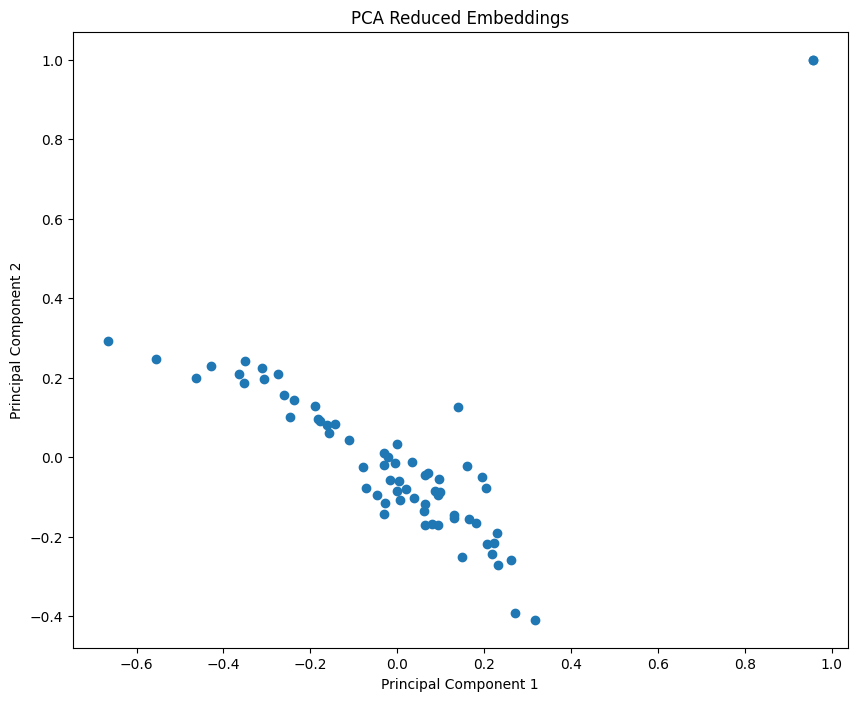

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(similarity_matrix)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], marker='o')
plt.title("PCA Reduced Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [4]:
from datetime import datetime, timedelta
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
similarity_matrix = cosine_similarity(outputs)
distance_matrix = 1 - similarity_matrix
np.fill_diagonal(distance_matrix, 0)




In [9]:
from sklearn.cluster import DBSCAN
from sklearn import metrics


db = DBSCAN(eps=0.5, min_samples=5).fit(similarity_matrix)

clusters = db.labels_

print(clusters)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [6]:
# 查看每个簇的文章数量
import numpy as np
unique_labels = np.unique(clusters)
for label in unique_labels:
    n_articles = sum(clusters == label)
    print(f"Cluster {label}: {n_articles} articles")

Cluster -1: 67 articles


In [310]:
clustered_list = {}
for article_id, cluster_id in enumerate(clusters):
    if cluster_id not in clustered_list:
        clustered_list[cluster_id] = []

    clustered_list[cluster_id].append(article_id)

file_path = "C:/Users/25031/Desktop/新建文件夹/dataset_pt2/_PUBLICO/A_wuhan_publico/RESULT/"
numC = 1
for cluster, n  in clustered_list.items():
    print("Cluster ", n[0]+1)
    print(cluster) 
    numC = numC+1
    

Cluster  1
(0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 13, 16, 17, 18, 21, 22, 23, 24, 26, 27, 29, 30, 31, 33, 34, 36, 37, 38, 43, 44, 45, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 100, 101, 102, 104, 105, 106, 107, 109, 111, 113, 115, 116, 121, 122, 124, 128, 130, 132, 137, 139, 140, 141, 144, 151, 152, 154, 155, 157, 166, 169, 173, 175, 177, 183, 184, 196, 200, 201, 202)
Cluster  2
(5,)
Cluster  3
(9,)
Cluster  4
(12,)
Cluster  5
(14, 35, 42, 48, 53, 70, 97, 99, 103, 108, 110, 129, 134, 136, 142, 143, 146, 147, 148, 150, 156, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 170, 171, 172, 174, 181, 182, 187, 188, 189, 190, 191, 192, 193, 195, 197)
Cluster  6
(15,)
Cluster  7
(19,)
Cluster  8
(20,)
Cluster  9
(25,)
Cluster  10
(28,)
Cluster  11
(32,)
Cluster  12
(39,)
Cluster  13
(40,)
Cluster  14
(41,)
Cluster  15
(46,)
Cluster  16
(47,)
Cluster  17
(49,)
Cluster  18
(50,)
Clus

In [311]:
# 统计聚类情况
cluster_num = []
cluster_index = []
for cluster, n in clustered_list.items():
    size = len(cluster)            
    cluster_index.append(n[0])
    cluster_num.append(size)
    
import pandas as pd

data = {
    'cluster': cluster_index,
    'num': cluster_num
}

df = pd.DataFrame(data)

print(df)    

df.to_csv('C:/Users/25031/Desktop/新建文件夹/dataset_pt2/_PUBLICO/A_wuhan_publico/TF+MCL.csv', index=False)

    cluster  num
0         0  110
1         1    1
2         2    1
3         3    1
4         4   46
5         5    1
6         6    1
7         7    1
8         8    1
9         9    1
10       10    1
11       11    1
12       12    1
13       13    1
14       14    1
15       15    1
16       16    1
17       17    1
18       18    1
19       19    1
20       20    1
21       21    1
22       22    1
23       23    1
24       24    1
25       25    1
26       26    1
27       27    1
28       28    1
29       29    1
30       30    1
31       31    2
32       32    1
33       33    2
34       34    1
35       35    2
36       36    1
37       37    1
38       38    1
39       39    1
40       40    1
41       41    1
42       42    1
43       43    1
44       44    1
45       45    2
46       46    1


In [312]:
import os
import re

folder_path = 'C:/Users/25031/Desktop/新建文件夹/dataset_pt2/_PUBLICO/A_wuhan_publico/time/'


# 日期格式
date_pattern = re.compile(r'\d{4}-\d{2}-\d{2}')
# 所有文章的对应日期信息
data_lists = []

count = 0
for count in range(len(outputs)):
    path = folder_path + str(count) + ".txt"
    with open(path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        data_list = [line.strip() for line in lines if date_pattern.match(line.strip())]
        data_lists.append(data_list)


In [313]:
print(data_lists[0])

['2020-03-16', '2020-03-16', '2020-03-15']


In [314]:
# Extract data from TLS DATASET
import os
folder_path = "C:/Users/25031/Desktop/新建文件夹/dataset_pt2/_PUBLICO/A_wuhan_publico/input_docs"
import os

dct = []    


for subdir in os.listdir(folder_path):
    subdir_path = os.path.join(folder_path, subdir)
    # 如果是文件夹，则进一步遍历其下的文件
    if os.path.isdir(subdir_path):
        for file_name in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, file_name)
            # 确保是文件而不是文件夹
            if os.path.isfile(file_path):
                # 打开文件并读取内容
                with open(file_path, 'r', encoding='utf-8') as file:
                    dct.append(file_name[0:10])

print(dct)

['2020-03-16', '2020-03-19', '2020-03-19', '2020-03-19', '2020-03-19', '2020-03-19', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-23', '2020-03-24', '2020-03-24', '2020-03-24', '2020-03-26', '2020-03-27', '2020-03-27', '2020-03-28', '2020-03-28', '2020-03-29', '2020-03-29', '2020-03-29', '2020-04-02', '2020-04-03', '2020-04-03', '2020-04-03', '2020-04-06', '2020-04-07', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-09', '2020-04-10', '2020-04-12', '2020-04-13', '2020-04-15', '2020-04-15', '2020-04-17', '2020-04-17', '2020-04-17', '2020-04-18', '2020-04-20', '2020-04-20', '2020-04-21', '2020-04-27', '2020-04-29', '2020-04-30', '2020-04-30', '2020-05-01', '2020-05-05', '2020-05-06', '2020-05-06', '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-11', '2020-05-12', '2020-05-15', '2020-05-17', '2020-05-18', '2020-05-20', '2020-05-20', '2020-05-22', '2020-05-22', '2020-05-23', '2020-05-25', '2020-05-27', '2020-05-28', '2020-05-30', '2020

In [315]:
count = 0
for count in range(len(outputs)):
    data_lists[count].append(dct[count])    
    
print(data_lists[0:5])


[['2020-03-16', '2020-03-16', '2020-03-15', '2020-03-16'], ['2020-03-19TMO', '2020-03-19', '2020-03-19'], ['2020-03-19', '2020-03-19', '2020-03-19'], ['2020-03-18', '2020-03-19'], ['2020-03-19', '2020-03-19']]


In [316]:
date_all_cluster = []

for cluster, n in clustered_list.items():
    date_each_cluster = []
    for article_num in cluster:
        for date in data_lists[article_num]:
            date_each_cluster.append(date[0:10])
            
    # cluster的编号对应日期list        
    temp = []
    temp.append(n[0]+1)
    temp.append(date_each_cluster)
    date_all_cluster.append(temp)
    
print(date_all_cluster[0])          

[1, ['2020-03-16', '2020-03-16', '2020-03-15', '2020-03-16', '2020-03-19', '2020-03-19', '2020-03-19', '2020-03-19', '2020-03-19', '2020-03-19', '2020-03-18', '2020-03-19', '2020-03-19', '2020-03-19', '2020-03-21', '2020-03-12', '2020-03-22', '2020-03-23', '2020-03-21', '2020-03-23', '2020-03-23', '2020-03-24', '2020-03-24', '2020-03-08', '2020-03-24', '2020-03-24', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-23', '2020-03-28', '2020-03-29', '2020-03-29', '2020-04-02', '2020-04-01', '2020-01-09', '2020-03-02', '2020-04-02', '2020-04-02', '2020-04-03', '2020-04-03', '2020-04-02', '2020-04-02', '2020-03-30', '2020-04-03', '2020-03-30', '2020-04-08', '2020-04-03', '2020-03-30', '2020-04-03', '2020-04-07', '2020-04-06', '2020-04-07', '2020-04-07', '2020-04-09', '2020-04-08', '2020-04-09', '2020-04-09', '2020-04-09', '2020-04-10', '2020-04-10', '2020-03-28', '2020-04-13', '2020-04-08', '2020-04-13', '2020-04-15', '2020-04-17', '2020-04-17', '2020-04-17', '2020-04-17', '2020-04-17', '

In [317]:
from collections import Counter
# 存取每个cluster对应的出现最多的日期和次数
set_of_cluster_date = []
for data in date_all_cluster:
    key = data[0]
    value = data[1]
    counter = Counter(value)
    most_common_element, count = counter.most_common(1)[0]
    print("CLUSTER : ", key)
    print(most_common_element)  
    print(count)  
    temp = {"cluster" : key, "date" : most_common_element, "count" : count}
    set_of_cluster_date.append(temp)

CLUSTER :  1
2020-03-19
9
CLUSTER :  2
2020-03-19
2
CLUSTER :  3
2020-03-17
1
CLUSTER :  4
2020-03-24
2
CLUSTER :  5
2021-02-09
6
CLUSTER :  6
2020-03-27
2
CLUSTER :  7
2020-03-29
2
CLUSTER :  8
2020-03-29
1
CLUSTER :  9
2020-04-06
2
CLUSTER :  10
2020-04-08
2
CLUSTER :  11
2020-04-12
2
CLUSTER :  12
2020-04-18
1
CLUSTER :  13
2020-04-20
2
CLUSTER :  14
2020-04-20
3
CLUSTER :  15
2020-04-30
2
CLUSTER :  16
2020-05-01
1
CLUSTER :  17
2020-05-06
2
CLUSTER :  18
2020-05-06
2
CLUSTER :  19
2020-05-20
2
CLUSTER :  20
2020-05-18
1
CLUSTER :  21
2020-06-15
4
CLUSTER :  22
2020-06-18
2
CLUSTER :  23
2020-07-10
1
CLUSTER :  24
2020-09-04
1
CLUSTER :  25
2020-09-10
1
CLUSTER :  26
2020-09-25
2
CLUSTER :  27
2020-09-29
2
CLUSTER :  28
2020-10-13
2
CLUSTER :  29
2021-04-15
1
CLUSTER :  30
2020-11-01
1
CLUSTER :  31
2020-11-13
2
CLUSTER :  32
2020-11-16
2
CLUSTER :  33
2020-12-10
1
CLUSTER :  34
2019-12-31
2
CLUSTER :  35
2020-12-28
2
CLUSTER :  36
2021-01-07
1
CLUSTER :  37
2021-01-14
4
CLUSTER : 

In [318]:
# 按照频率进行排序
sorted_list = sorted(set_of_cluster_date, key=lambda x: x['count'], reverse=True)

for item in sorted_list:
    print(item)

{'cluster': 1, 'date': '2020-03-19', 'count': 9}
{'cluster': 5, 'date': '2021-02-09', 'count': 6}
{'cluster': 21, 'date': '2020-06-15', 'count': 4}
{'cluster': 37, 'date': '2021-01-14', 'count': 4}
{'cluster': 14, 'date': '2020-04-20', 'count': 3}
{'cluster': 46, 'date': '2021-07-16', 'count': 3}
{'cluster': 2, 'date': '2020-03-19', 'count': 2}
{'cluster': 4, 'date': '2020-03-24', 'count': 2}
{'cluster': 6, 'date': '2020-03-27', 'count': 2}
{'cluster': 7, 'date': '2020-03-29', 'count': 2}
{'cluster': 9, 'date': '2020-04-06', 'count': 2}
{'cluster': 10, 'date': '2020-04-08', 'count': 2}
{'cluster': 11, 'date': '2020-04-12', 'count': 2}
{'cluster': 13, 'date': '2020-04-20', 'count': 2}
{'cluster': 15, 'date': '2020-04-30', 'count': 2}
{'cluster': 17, 'date': '2020-05-06', 'count': 2}
{'cluster': 18, 'date': '2020-05-06', 'count': 2}
{'cluster': 19, 'date': '2020-05-20', 'count': 2}
{'cluster': 22, 'date': '2020-06-18', 'count': 2}
{'cluster': 26, 'date': '2020-09-25', 'count': 2}
{'clust

In [319]:
# 确认 gold_standard 里面有几个时间
file_path = "C:/Users/25031/Desktop/新建文件夹/dataset_pt/txt/wuhan_publico/timelines/wuhan.txt"
separator = "--------------------------------"
with open(file_path, "r", encoding='utf-8') as file:
    content = file.read()
    
content = content.replace('\n', '')
data = content.split(separator)
pro_data = []
for d in data :
    if d != '':
        pro_data.append(d[0:10])
    
print(len(pro_data))

72


In [320]:
# 对比 gold_standard 和 聚类结果
num_of_tls = len(pro_data)

cluster = sorted_list[0:num_of_tls]

Golden = []
for clus in cluster :
    Golden.append(clus["date"])

print(len(Golden))    
print(num_of_tls) 

#print(Golden)    
#print(pro_data) 

set1 = set(Golden)
set2 = set(pro_data)

# 找出相同的日期
common_elements = set1 & set2

common_num = len(common_elements)

precision = common_num/num_of_tls
recall = common_num/num_of_tls
print("Precision : ", precision)

F1_score = (2*precision*recall)/(precision+recall)
print("F1 SCORE : ", F1_score)


47
72
Precision :  0.20833333333333334
F1 SCORE :  0.20833333333333334
